In [ ]:
# 한글화
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothic'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# 생산량
production = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/김용현/완료data/생산량/전국 해면어업 품종별 생산량.csv')

# 평균가
price = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/수산물_위판정보_전처리완료.csv')

# 광어 생산량_평균가 상관관계

In [ ]:
# `수산물_위판정보_전처리완료`에서 광어만 뽑아옴 
ff_price = price[price['수산물표준코드명'] == '광어']
ff_price.reset_index(drop=True, inplace=True)

for row in range(len(ff_price)):
  ff_price.loc[row, '위판일자'] = ff_price.loc[row, '위판일자'].replace('-0','-').replace("-",".")

In [ ]:
# 19년도부터 21년도까지 총 36개월 생산량 자료 구해서 list로   
ff_price_list = []
for y in range(3):
  for m in range(1,13):
    month_price = []
    for d in range(1,32):
      if ff_price[ff_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean() >= 0 : 
        month_price.append(ff_price[ff_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean())
    ff_price_list.append( round( sum(month_price) / len(month_price), 2 ) )

In [ ]:
# 해면어업 품종별 생산량에서 광어만 뽑음
ff_production = production[production['품종별'] == '넙치류'].reset_index(drop=True)

# 계산하기 편하게하기 위해 컬럼명 바꿔줌
for col in range(1,len(ff_production.columns) ) :
  old_col = ff_production.columns[col]
  new_col = ff_production.columns[col].replace(".0",".").replace("월","").replace(" ","")
  ff_production.rename(columns={ old_col : new_col },inplace=True)

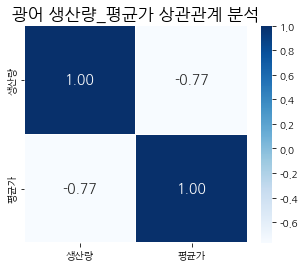

In [ ]:
# 광어
ff_corr = {'일자': list(ff_production.columns[1:].values), '생산량': list(ff_production.iloc[0,1:].values), '평균가': ff_price_list} 
ff_corr = pd.DataFrame(ff_corr)
# ff_corr

plt.figure( figsize= (5,4) )
plt.title(' 광어 생산량_평균가 상관관계 분석 ', fontsize = 17)
sns.heatmap( data = ff_corr.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

# 방어 생산량_평균가 상관관계

In [ ]:
# `수산물_위판정보_전처리완료`에서 방어만 뽑아옴 
yt_price = price[price['수산물표준코드명'] == '방어']
yt_price.reset_index(drop=True, inplace=True)

for row in range(len(yt_price)):
  yt_price.loc[row, '위판일자'] = yt_price.loc[row, '위판일자'].replace('-0','-').replace("-",".")

# 19년도부터 21년도까지 총 36개월 생산량 자료 구해서 list로   
yt_price_list = []
for y in range(3):
  for m in range(1,13):
    month_price = []
    for d in range(1,32):
      if yt_price[yt_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean() >= 0 : 
        month_price.append(yt_price[yt_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean())
    yt_price_list.append( round( sum(month_price) / len(month_price), 2 ) )

In [ ]:
# 해면어업 품종별 생산량에서 방어만 뽑음
yt_production = production[production['품종별'] == '방어류'].reset_index(drop=True)

# 계산하기 편하게하기 위해 컬럼명 바꿔줌
for col in range(1,len(yt_production.columns) ) :
  old_col = yt_production.columns[col]
  new_col = yt_production.columns[col].replace(".0",".").replace("월","").replace(" ","")
  yt_production.rename(columns={ old_col : new_col },inplace=True)

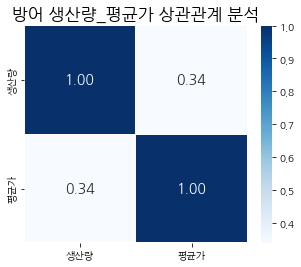

In [ ]:
# 방어
yt_corr = {'일자': list(yt_production.columns[1:].values), '생산량': list(yt_production.iloc[0,1:].values), '평균가': yt_price_list} 
yt_corr = pd.DataFrame(yt_corr)
# yt_corr

plt.figure( figsize= (5,4) )
plt.title(' 방어 생산량_평균가 상관관계 분석 ', fontsize = 17)
sns.heatmap( data = yt_corr.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

# 감성돔 생산량_평균가 상관관계

In [ ]:
# `수산물_위판정보_전처리완료`에서 감성돔만 뽑아옴 
bp_price = price[price['수산물표준코드명'] == '감성돔']
bp_price.reset_index(drop=True, inplace=True)

for row in range(len(bp_price)):
  bp_price.loc[row, '위판일자'] = bp_price.loc[row, '위판일자'].replace('-0','-').replace("-",".")

# 19년도부터 21년도까지 총 36개월 평균가 구해서 list로   
bp_price_list = []
for y in range(3):
  for m in range(1,13):
    month_price = []
    for d in range(1,32):
      if bp_price[bp_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean() >= 0 : 
        month_price.append(bp_price[bp_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean())
    bp_price_list.append( round( sum(month_price) / len(month_price), 2 ) )

In [ ]:
# 해면어업 품종별 생산량에서 감성돔만 뽑음
bp_production = production[production['품종별'] == '감성돔'].reset_index(drop=True)

# 계산하기 편하게하기 위해 컬럼명 바꿔줌
for col in range(1,len(bp_production.columns) ) :
  old_col = bp_production.columns[col]
  new_col = bp_production.columns[col].replace(".0",".").replace("월","").replace(" ","")
  bp_production.rename(columns={ old_col : new_col },inplace=True)

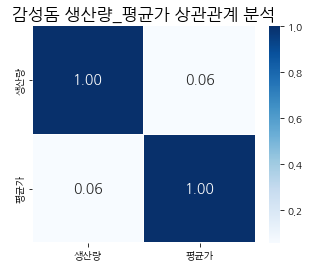

In [ ]:
# 감성돔
bp_corr = {'일자': list(bp_production.columns[1:].values), '생산량': list(bp_production.iloc[0,1:].values), '평균가': bp_price_list} 
bp_corr = pd.DataFrame(bp_corr)
# bp_corr

plt.figure( figsize= (5,4) )
plt.title(' 감성돔 생산량_평균가 상관관계 분석 ', fontsize = 17)
sns.heatmap( data = bp_corr.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

# 수온 데이터 포함


In [ ]:
namhae_wt = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/상관관계 분석 data/남해바다 지역별 수온측정.csv')   
donghae_wt = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/상관관계 분석 data/동해바다 지역별 수온측정.csv')
seohae_wt = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/상관관계 분석 data/서해바다 지역별 수온측정.csv')

wt, namhae_wt_list, donghae_wt_list, seohae_wt_list = [], [], [], []   # 그냥 wt는 동,서,남해 전체의 수온
for row in range(len(namhae_wt)):
  namhae_wt_list.append(round(namhae_wt.iloc[row,1:].values.mean(), 2))
  donghae_wt_list.append(round(donghae_wt.iloc[row,1:].values.mean(), 2))
  seohae_wt_list.append(round(seohae_wt.iloc[row,1:].values.mean(), 2))
  wt.append( round( (namhae_wt_list[row] + donghae_wt_list[row] + seohae_wt_list[row])/3 , 2 ))
# namhae_wt



ff_corr['남해_수온'] = namhae_wt_list;  yt_corr['남해_수온'] = namhae_wt_list;  bp_corr['남해_수온'] = namhae_wt_list
ff_corr['동해_수온'] = donghae_wt_list;  yt_corr['동해_수온'] = donghae_wt_list;  bp_corr['동해_수온'] = donghae_wt_list
ff_corr['서해_수온'] = seohae_wt_list;  yt_corr['서해_수온'] = seohae_wt_list;  bp_corr['서해_수온'] = seohae_wt_list
ff_corr['전체_수온'] = wt;  yt_corr['전체_수온'] = wt;  bp_corr['전체_수온'] = wt

In [ ]:
## 이상치 제거
# ###  방어  ###
# # 수온 < 15, 생산량 < 550 값들을 이상치로 봄 
# yt_corr[(yt_corr['생산량'] < 550) & (yt_corr['남해_수온'] < 15) ]

# yt_corr.drop([0,1,2,3,13,14,15,24,25,26], axis = 0,inplace=True)
# yt_corr.reset_index(drop=True,inplace=True)

# # ------------------------------------------------------------------

# ###  감성돔  ###
# # 수온 < 14, 생산량 < 75 인 값들을 이상치로 봄
# bp_corr[(bp_corr['생산량'] < 75) & (bp_corr['동해_수온'] < 14) ]

# bp_corr.drop([1,2,12,13,14,23,24,25,26], axis = 0, inplace=True)
# bp_corr.reset_index(drop=True,inplace=True)

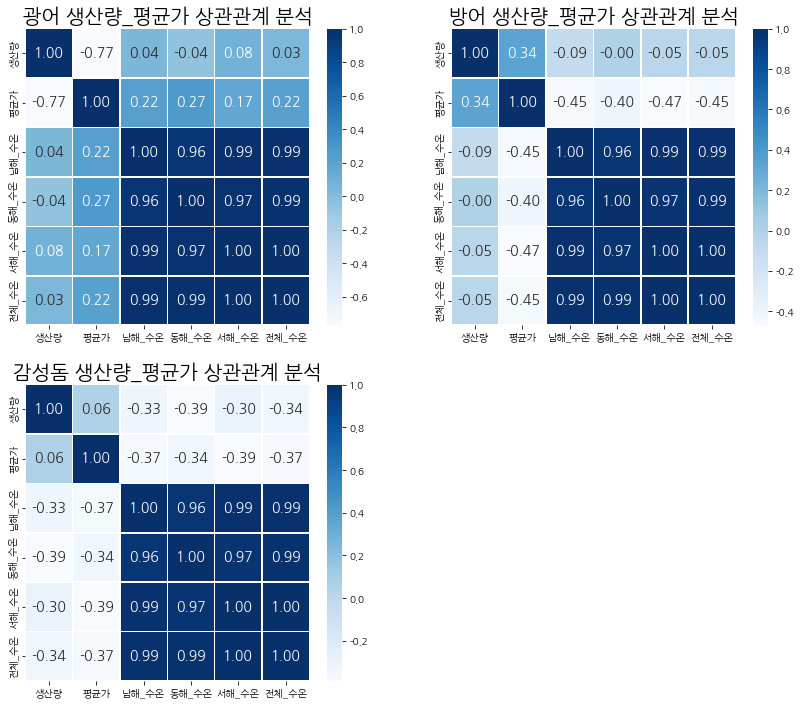

In [ ]:
plt.figure( figsize=(14,12) )

plt.subplot( 2, 2, 1)
# plt.figure( figsize= (6,5) )
plt.title(' 광어 생산량_평균가 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = ff_corr.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues' ,annot_kws = {'size' : 14})

plt.subplot( 2, 2, 2)
# plt.figure( figsize= (6,5) )
plt.title(' 방어 생산량_평균가 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = yt_corr.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

plt.subplot( 2, 2, 3)
# plt.figure( figsize= (6,5) )
plt.title(' 감성돔 생산량_평균가 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = bp_corr.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

**상관계수가 `0.6 ~ 1`, `-1 ~ -0.6`인 경우 강한 상관관계로 해석하였음**
* 평균가와 생산량
  - 광어의 경우 생산량이 증가함에 따라 평균가가 낮아짐을 알 수 있음 (강한 음의 상관관계)
  - 방어의 경우 생산량이 증가함에 따라 평균가도 증가함을 알 수 있음 (약한 양의 상관관계)
  - 감성돔은 크게 상관관계가 없어 보임

* 수온과 생산량
  - 광어(넙치류)는 수심 200m 아래에 서식하다보니 수온에 크게 영향을 받지 않음 (상관관계가 거의 없다고 봐도 무방)

  - 반면 그렇지 않은 
    - 방어의 경우 수온이 낮아짐에 따라 생산량이 증가함을 알 수 있음 (강한 음의 상관관계)
    - 감성돔의 경우에도 수온이 낮아짐에 따라 생산량이 증가함을 알 수 있음 (강한 음의 상관관계)     

# 재훈님 요청
* 광어는 서해 
* 방어는 동해
* 감성돔 남해   

In [ ]:
hun_ff = ff_corr[['일자','생산량','서해_수온']]
hun_yt = yt_corr[['일자','생산량','동해_수온']]
hun_bp = bp_corr[['일자','생산량','남해_수온']]

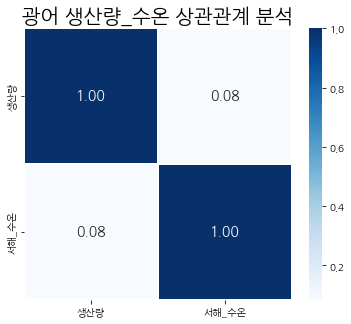

In [ ]:
plt.figure( figsize= (6,5) )
plt.title(' 광어 생산량_수온 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = hun_ff.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues' ,annot_kws = {'size' : 14})

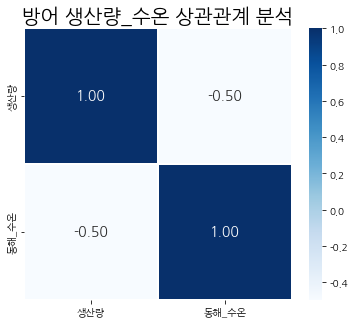

In [ ]:
plt.figure( figsize= (6,5) )
plt.title(' 방어 생산량_수온 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = hun_yt.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

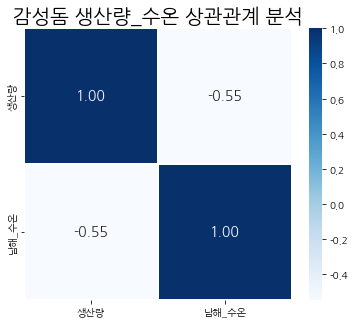

In [ ]:
plt.figure( figsize= (6,5) )
plt.title(' 감성돔 생산량_수온 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = hun_bp.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

## 생산량, 평균가

In [ ]:
# 생산량, 평균가
hun_ff_2 = ff_corr[['일자','생산량','평균가']]
hun_yt_2 = yt_corr[['일자','생산량','평균가']]
hun_bp_2 = bp_corr[['일자','생산량','평균가']]
hun_bp_3 = bp_corr[['일자','생산량','남해_수온']]

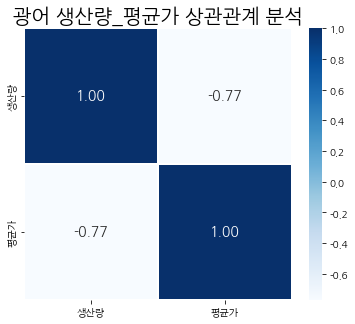

In [ ]:
plt.figure( figsize= (6,5) )
plt.title(' 광어 생산량_평균가 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = hun_ff_2.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues' ,annot_kws = {'size' : 14})

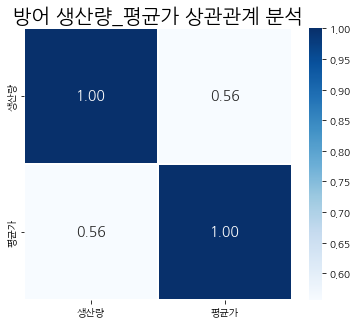

In [ ]:
plt.figure( figsize= (6,5) )
plt.title(' 방어 생산량_평균가 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = hun_yt_2.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

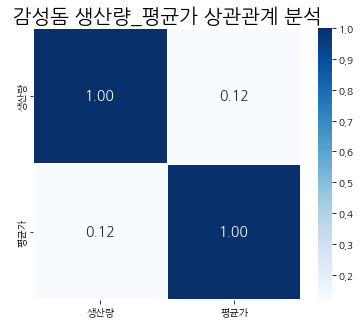

In [ ]:
plt.figure( figsize= (6,5) )
plt.title(' 감성돔 생산량_평균가 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = hun_bp_2.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

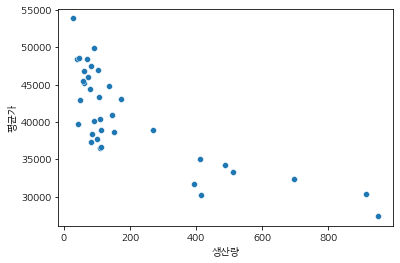

In [ ]:
# 광어 생산량 가격
sns.scatterplot(data=ff_corr, x='생산량',y='평균가')

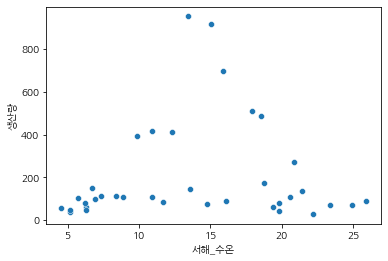

In [ ]:
# 광어 생산량 서해_수온
sns.scatterplot(data=ff_corr, x='서해_수온',y='생산량')

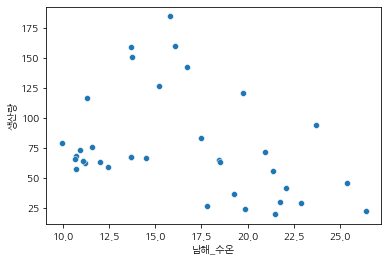

In [ ]:
# 감성돔 남해_수온 생산량 산점도  -  (이상치 제거 안한상태)
sns.scatterplot(data=bp_corr, x='남해_수온',y='생산량')

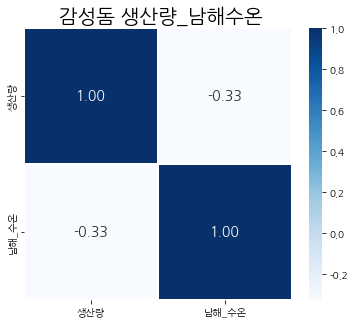

In [ ]:
# 감성돔 남해_수온 생산량 상관관계  -  (이상치 제거 안한상태)
plt.figure( figsize= (6,5) )
plt.title(' 감성돔 생산량_남해수온', fontsize = 20)
sns.heatmap( data = hun_bp_3.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues' ,annot_kws = {'size' : 14})